In [ ]:
# prompt: Import numpy pandas matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# prompt: load the dataset using pandas

df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


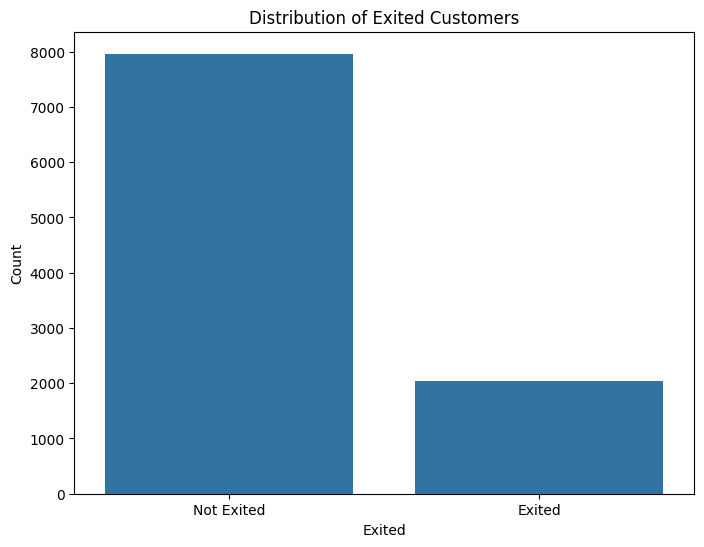

In [ ]:
# prompt: plot to get Exited

# Exited vs Not Exited
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Exited Customers')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Exited', 'Exited'])
plt.show()

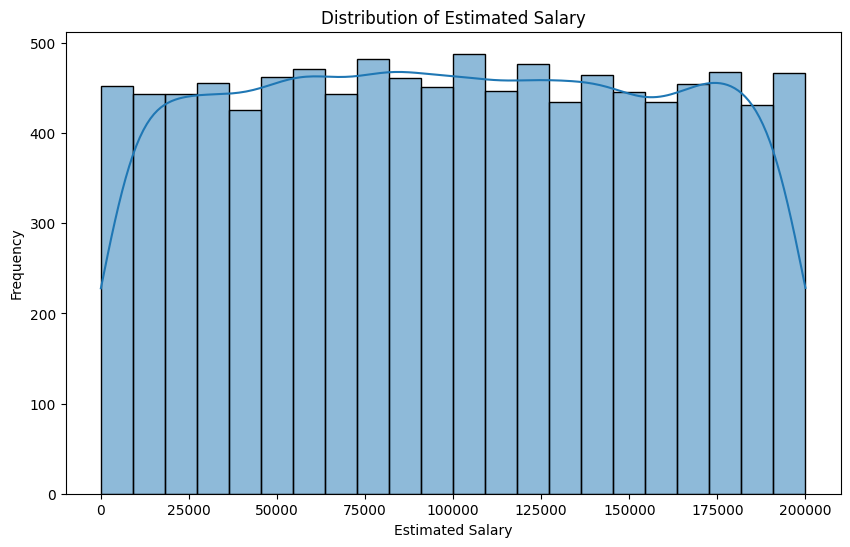

In [ ]:
# prompt: plot for EstimatedSalary

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='EstimatedSalary', kde=True)
plt.title('Distribution of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

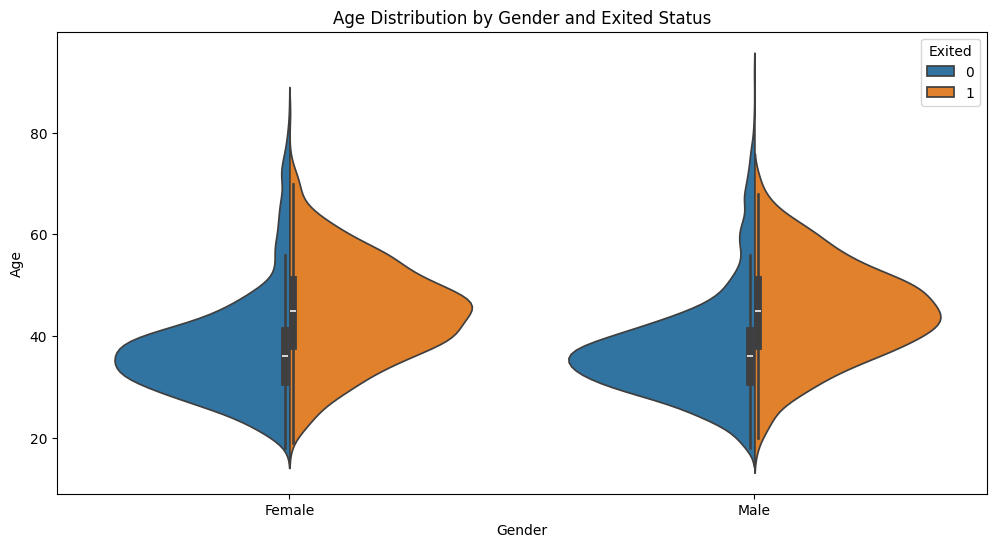

In [ ]:
# prompt: create a plot for gender,age and Exited

plt.figure(figsize=(12, 6))
sns.violinplot(x='Gender', y='Age', hue='Exited', data=df, split=True)
plt.title('Age Distribution by Gender and Exited Status')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

In [ ]:
# prompt: drop rownumber,customerid,surname

df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# prompt: make a ml model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separate features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=np.number).columns

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the full pipeline including preprocessing and the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())]) # Using Logistic Regression as a starting point

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
class_report


Accuracy: 0.808
Confusion Matrix:
[[1540   53]
 [ 331   76]]
Classification Report:


'              precision    recall  f1-score   support\n\n           0       0.82      0.97      0.89      1593\n           1       0.59      0.19      0.28       407\n\n    accuracy                           0.81      2000\n   macro avg       0.71      0.58      0.59      2000\nweighted avg       0.78      0.81      0.77      2000\n'

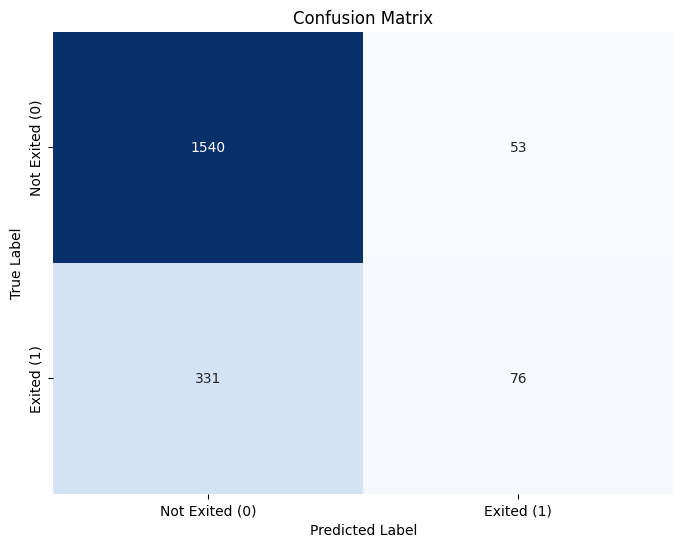

In [ ]:
# prompt: confusion matrix in visual form

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Not Exited (0)', 'Exited (1)'])
plt.yticks([0.5, 1.5], ['Not Exited (0)', 'Exited (1)'])
plt.show()